<a href="https://colab.research.google.com/github/KaueAbbe/Desigualdade_Educacional/blob/main/Analise_Exploratoria/Desigualdade_Educacional_AE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color = 'green' size = 6> Desigualdade Educacional - Análise Exploratória</font>

**Resumo do Projeto:**

Desigualdade Educacional é uma questão social presente em todos os países, e que ocorre por diversos motivos. Entre esses motivos há diferenças econômicas, de gênero, cor de pele, geográfica. Independente do motivo, a desigualdade reflete no poder social do país, o qual é mostrado pelo índice de desenvolvimento humano e no grupo de desenvolvimento humano ao qual o país pertence.

Dado este contexto, o projeto tem como motivação compreender como está e como evolui a desigualdade mundial no contexto da educação, conectando a relação de mudança na desigualdade índices de desenvolvimento do páis, e com alvo em relacionar o grupo de desenvolvimento do país com as outras variáveis.

**Resumo do Notebook:**



**Resumo dos Dados:**

Os dados usados nesse notebook tem origem em:
1. [Inequality in Education Around the Workd](https://www.kaggle.com/datasets/iamsouravbanerjee/inequality-in-education-around-the-world)
2. [Humam Development Reports](https://hdr.undp.org/data-center/documentation-and-downloads)

# Importar dados e Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

dados = pd.read_csv('/content/drive/MyDrive/Data Science/Projeto - Desigualdade/Desigualdade_tratado.csv')
dados.head()

,ISO3,paises,Human Development Groups,regioes,IDH(2021),taxa 2010,taxa 2011,taxa 2012,taxa 2013,taxa 2014,taxa 2015,taxa 2016,taxa 2017,taxa 2018,taxa 2019,taxa 2020,taxa 2021,expectativa_vida,Anos esperado de escola,media anos de escola
0,AFG,Afghanistan,Baixa,SA,180.0,42.809000,44.823380,44.823380,44.823380,44.823380,45.365170,45.365170,45.365170,45.365170,45.365170,45.365170,45.365170,61.9824,10.263844,2.985070
1,ALB,Albania,Alta,ECA,67.0,11.900000,11.900000,11.900000,11.900000,11.900000,11.900000,11.900000,12.333440,12.333440,12.333440,12.333440,12.333440,76.4626,14.448000,11.286455
2,DZA,Algeria,Alta,AS,91.0,33.553913,33.553913,33.553913,33.689560,33.689560,33.689560,33.689560,33.689560,33.689560,33.282620,33.282620,33.282620,76.3767,14.626896,8.069284
3,AND,Andorra,Muito Alta,NaN,40.0,15.160302,15.160302,15.160302,15.160302,9.965681,10.083815,10.008154,10.008154,10.008154,10.008154,10.008154,10.008154,80.3684,13.300239,10.555120
4,AGO,Angola,Media,SSA,148.0,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,61.6434,12.172100,5.417391


#Pandas Profilling

In [ ]:
pip install pandas-profiling


In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(dados, title="Relatório de Perfil - Meu DataFrame", explorative=True)

<ipython-input-5-d0f8c64049e7>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [ ]:
profile

In [ ]:
profile.to_file("relatorio_de_perfil.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

 1. Quais são as variáveis qualitativas: Paises, Human Development Groups, Regioes, IDH.

 2. O restante são variáveis quantitativas.

 3. Existe muita correlação entre todas as taxas e com o IDH.

 4. Existem ainda alguns valores faltantes.

 5. Existe relação quasi-linear entre IDH com: expectativa de vida, Anos de escola esperado e média de anos de escola.

 # Sobre a variávels target: Grupo de desenvolvimento humano:

 1. Temos 4 categorias: Muita alta, alta, média e baixa
 2. Existe boa distribuição dos dados entre as categorias



# Sobre a variável alvo: Grupo de desenvolvimento humano


## Qual a relação por grupo do IDH médio?







In [3]:
def grupo_HDG(coluna_desejada, comentario, xini, xfim,tit,  ascending = False):
  df = pd.DataFrame(dados.groupby(by = 'Human Development Groups').mean()[coluna_desejada])
  df = df.reset_index()
  df.sort_values(by = coluna_desejada, ascending = ascending, inplace = True)
  df[coluna_desejada] = df[coluna_desejada].round(2)

  plt.figure(figsize = (12, 6))
  cores = ['darkblue', 'darkblue'] + ['gray'] * (len(df) - 2)
  ax = sns.barplot(data = df, x = coluna_desejada, y = 'Human Development Groups', palette = cores)

  plt.suptitle(tit + 'por Grupo de Desenvolvimento Humano', fontsize = 16, y = 1.00)
  plt.ylabel('Grupo de Desenvolvimento Humano', fontsize = 13)
  plt.title(comentario, fontsize = 12, loc = 'left', color = 'darkblue')


  for i, barra in enumerate(ax.patches):
      valor = df[coluna_desejada].iloc[i]
      largura_barra = barra.get_width()
      ax.text(largura_barra +1 , barra.get_y() + barra.get_height() / 2, f'{valor}', va='center')


  plt.gca().get_xaxis().set_visible(False)
  ax.spines['top'].set_color('none')
  ax.spines['right'].set_color('none')
  ax.spines['bottom'].set_color('none')  # Remove a borda inferior (eixo x)
  ax.spines['left'].set_color('none')

  plt.xlim(xini, xfim)
  plt.show()

<ipython-input-75-e0d4f84d4d0f>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = pd.DataFrame(dados.groupby(by = 'Human Development Groups').mean()[coluna_desejada])


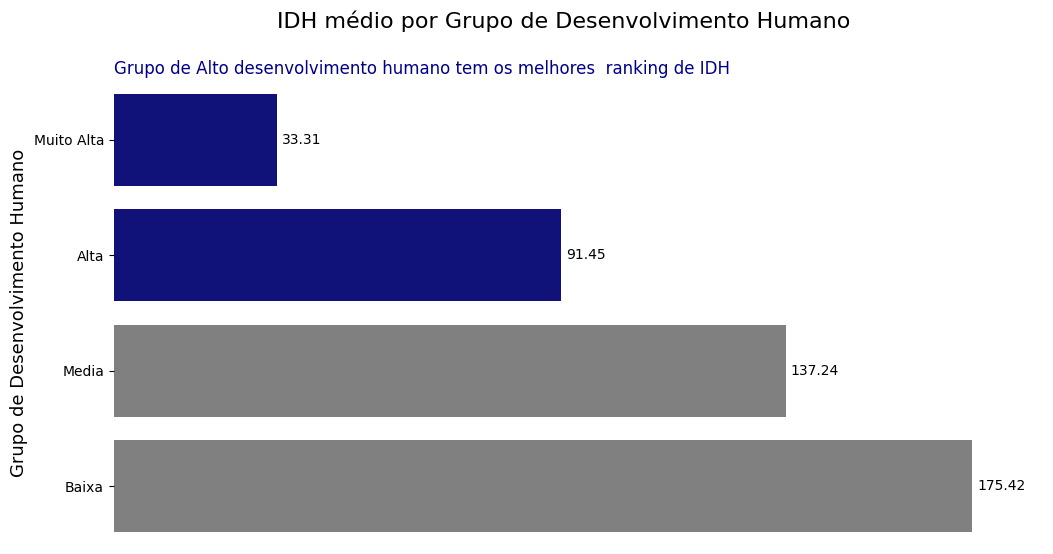

In [ ]:
grupo_HDG('IDH(2021)', 'Grupo de Alto desenvolvimento humano tem os melhores  ranking de IDH',0,190, 'IDH médio ', True,)

<ipython-input-75-e0d4f84d4d0f>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = pd.DataFrame(dados.groupby(by = 'Human Development Groups').mean()[coluna_desejada])


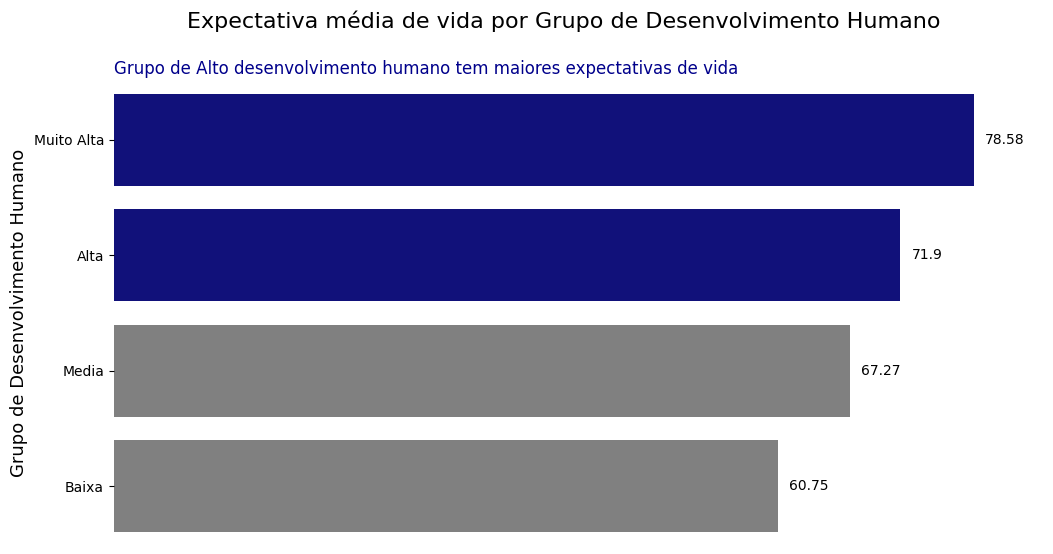

In [ ]:
grupo_HDG('expectativa_vida', 'Grupo de Alto desenvolvimento humano tem maiores expectativas de vida',0,85, 'Expectativa média de vida ')

<ipython-input-75-e0d4f84d4d0f>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = pd.DataFrame(dados.groupby(by = 'Human Development Groups').mean()[coluna_desejada])


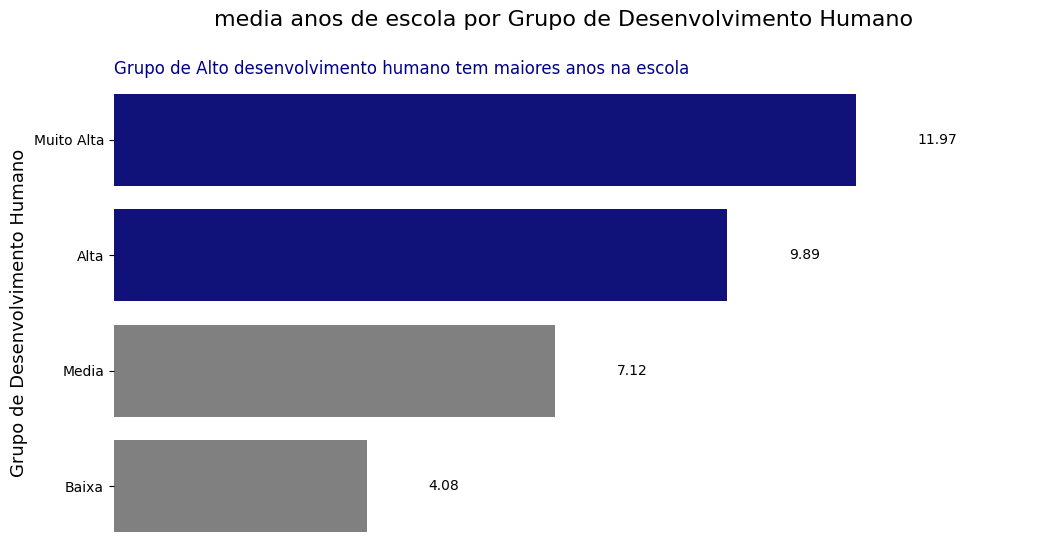

In [ ]:
grupo_HDG('media anos de escola', 'Grupo de Alto desenvolvimento humano tem maiores anos na escola',0,15, 'media anos de escola ')

<ipython-input-3-e0d4f84d4d0f>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = pd.DataFrame(dados.groupby(by = 'Human Development Groups').mean()[coluna_desejada])


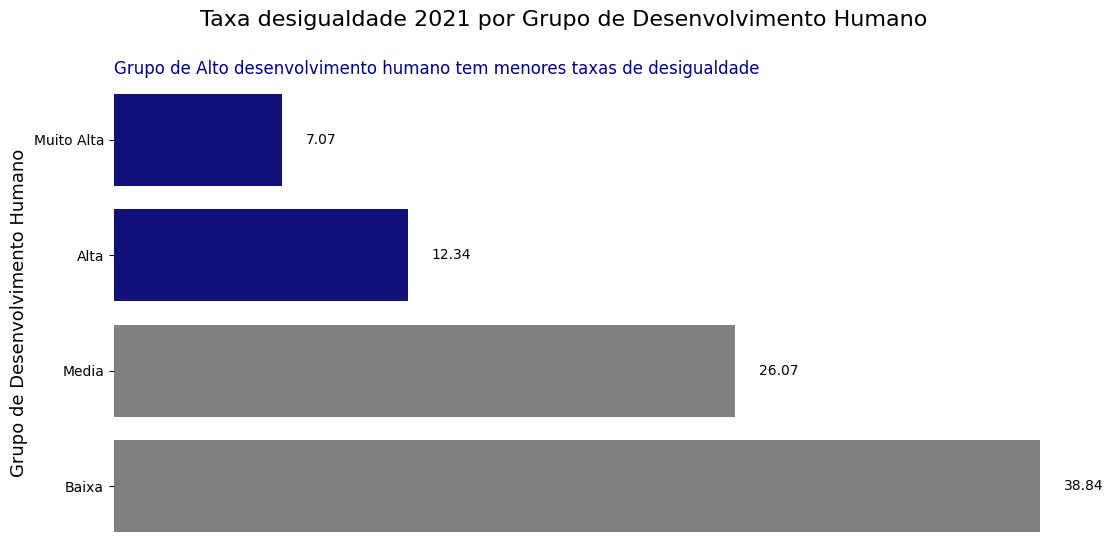

In [8]:
grupo_HDG('taxa 2021', 'Grupo de Alto desenvolvimento humano tem menores taxas de desigualdade',0,39, 'Taxa desigualdade 2021 ', ascending = True)

# Groups e Regiões


In [ ]:
pd.DataFrame(dados.groupby(by = 'Human Development Groups').count()['regioes']).sort_values(by = 'regioes')

,regioes
Human Development Groups,
Muito Alta,23
Baixa,31
Media,42
Alta,43


* Existem menos países com HDG muito alta.
* A maioria fica entre Média e Alta.
* Baixa está em segundo lugar com menos países.

# Taxa de desenvolvimento entre 2010 e 2021

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
Linear = LinearRegression()

In [ ]:
taxas =['taxa '+ str(x) for x in range(2010, 2022)]
taxas

['taxa 2010',
 'taxa 2011',
 'taxa 2012',
 'taxa 2013',
 'taxa 2014',
 'taxa 2015',
 'taxa 2016',
 'taxa 2017',
 'taxa 2018',
 'taxa 2019',
 'taxa 2020',
 'taxa 2021']

In [ ]:
df_taxas= dados[taxas]
df_taxas.head()

,taxa 2010,taxa 2011,taxa 2012,taxa 2013,taxa 2014,taxa 2015,taxa 2016,taxa 2017,taxa 2018,taxa 2019,taxa 2020,taxa 2021
0,42.809000,44.823380,44.823380,44.823380,44.823380,45.365170,45.365170,45.365170,45.365170,45.365170,45.365170,45.365170
1,11.900000,11.900000,11.900000,11.900000,11.900000,11.900000,11.900000,12.333440,12.333440,12.333440,12.333440,12.333440
2,33.553913,33.553913,33.553913,33.689560,33.689560,33.689560,33.689560,33.689560,33.689560,33.282620,33.282620,33.282620
3,15.160302,15.160302,15.160302,15.160302,9.965681,10.083815,10.008154,10.008154,10.008154,10.008154,10.008154,10.008154
4,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440


In [ ]:
df_taxas.T

,0,1,2,3,4,5,6,7,8,9,...,172,173,174,175,176,177,178,179,180,181
taxa 2010,42.80900,11.90000,33.553913,15.160302,34.17144,6.91431,3.68500,2.746427,2.48836,3.727167,...,2.61782,2.912104,8.40132,0.661381,17.49305,17.532918,16.57815,48.09012,23.76000,17.82500
taxa 2011,44.82338,11.90000,33.553913,15.160302,34.17144,6.83090,3.68500,2.477821,3.66724,3.731171,...,2.61782,2.903006,7.40243,0.661381,17.49305,13.359263,16.57815,48.09012,23.76000,17.82500
taxa 2012,44.82338,11.90000,33.553913,15.160302,34.17144,6.43056,3.68500,2.475142,3.48986,3.702155,...,2.78598,2.823744,7.15325,0.661381,17.49305,13.359263,16.57815,48.09012,23.76000,17.82500
taxa 2013,44.82338,11.90000,33.689560,15.160302,34.17144,6.51336,3.68500,2.935539,4.29767,3.515670,...,2.83294,3.000270,6.98308,0.779397,17.49305,13.359263,16.57815,46.13765,23.76000,17.82500
taxa 2014,44.82338,11.90000,33.689560,9.965681,34.17144,6.19228,3.68500,2.832901,2.65811,3.491246,...,2.83294,3.042451,6.84863,0.765510,17.49305,13.359263,17.63946,46.13765,21.73491,17.39521
taxa 2015,45.36517,11.90000,33.689560,10.083815,34.17144,6.33131,3.68500,2.720964,2.60756,3.537645,...,3.75860,3.036150,6.81665,0.757375,17.49305,14.283637,17.63946,46.13765,21.73491,16.80576
taxa 2016,45.36517,11.90000,33.689560,10.008154,34.17144,6.15194,2.93495,2.672566,2.57064,3.549497,...,3.74374,2.915457,6.65935,0.724854,17.49305,8.670590,17.63946,46.13765,21.73491,16.80576
taxa 2017,45.36517,12.33344,33.689560,10.008154,34.17144,6.20843,2.93495,3.043233,2.99960,3.565062,...,2.73404,2.915457,6.63096,0.724854,17.49305,8.670590,17.63946,46.13765,21.73491,16.80576
taxa 2018,45.36517,12.33344,33.689560,10.008154,34.17144,5.95181,2.93495,3.056570,2.91745,3.565062,...,2.84785,2.745850,6.52606,0.550110,17.49305,8.670590,17.63946,46.13765,20.43572,16.80576
taxa 2019,45.36517,12.33344,33.282620,10.008154,34.17144,5.78729,2.93495,3.056570,2.91745,3.565062,...,2.84785,2.745850,6.54951,0.550110,17.49305,8.670590,17.63946,46.13765,20.43572,14.60503


In [ ]:
df_taxas.T[0].values

array([42.809  , 44.82338, 44.82338, 44.82338, 44.82338, 45.36517,
       45.36517, 45.36517, 45.36517, 45.36517, 45.36517, 45.36517])

In [ ]:
anos = [x for x in range(2010, 2022)]
anos

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]

In [ ]:
for coluna in df_taxas.T.columns:
  y = df_taxas.T[coluna].values
  x = anos



In [ ]:
x = np.array(x).reshape(-1,1)
x

array([[2010],
       [2011],
       [2012],
       [2013],
       [2014],
       [2015],
       [2016],
       [2017],
       [2018],
       [2019],
       [2020],
       [2021]])

In [ ]:
y = y.reshape(-1,1)
y.shape

(12, 1)

In [ ]:
Linear.fit(x, y)
Linear.coef_[0][0]

-0.32798510489510474

In [ ]:
taxas = []
for coluna in df_taxas.T.columns:
  y = df_taxas.T[coluna].values
  x = anos
  x = np.array(x).reshape(-1,1)
  y = y.reshape(-1,1)

  Linear.fit(x, y)
  taxas.append(Linear.coef_[0][0])



In [ ]:
taxas

In [ ]:
dados.head()

,ISO3,paises,Human Development Groups,regioes,IDH(2021),taxa 2010,taxa 2011,taxa 2012,taxa 2013,taxa 2014,taxa 2015,taxa 2016,taxa 2017,taxa 2018,taxa 2019,taxa 2020,taxa 2021,expectativa_vida,Anos esperado de escola,media anos de escola
0,AFG,Afghanistan,Baixa,SA,180.0,42.809000,44.823380,44.823380,44.823380,44.823380,45.365170,45.365170,45.365170,45.365170,45.365170,45.365170,45.365170,61.9824,10.263844,2.985070
1,ALB,Albania,Alta,ECA,67.0,11.900000,11.900000,11.900000,11.900000,11.900000,11.900000,11.900000,12.333440,12.333440,12.333440,12.333440,12.333440,76.4626,14.448000,11.286455
2,DZA,Algeria,Alta,AS,91.0,33.553913,33.553913,33.553913,33.689560,33.689560,33.689560,33.689560,33.689560,33.689560,33.282620,33.282620,33.282620,76.3767,14.626896,8.069284
3,AND,Andorra,Muito Alta,NaN,40.0,15.160302,15.160302,15.160302,15.160302,9.965681,10.083815,10.008154,10.008154,10.008154,10.008154,10.008154,10.008154,80.3684,13.300239,10.555120
4,AGO,Angola,Media,SSA,148.0,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,61.6434,12.172100,5.417391


In [ ]:
dados['taxa_aumento'] = taxas
dados.head()

,ISO3,paises,Human Development Groups,regioes,IDH(2021),taxa 2010,taxa 2011,taxa 2012,taxa 2013,taxa 2014,...,taxa 2016,taxa 2017,taxa 2018,taxa 2019,taxa 2020,taxa 2021,expectativa_vida,Anos esperado de escola,media anos de escola,taxa_aumento
0,AFG,Afghanistan,Baixa,SA,180.0,42.809000,44.823380,44.823380,44.823380,44.823380,...,45.365170,45.365170,45.365170,45.365170,45.365170,45.365170,61.9824,10.263844,2.985070,1.437791e-01
1,ALB,Albania,Alta,ECA,67.0,11.900000,11.900000,11.900000,11.900000,11.900000,...,11.900000,12.333440,12.333440,12.333440,12.333440,12.333440,76.4626,14.448000,11.286455,5.304336e-02
2,DZA,Algeria,Alta,AS,91.0,33.553913,33.553913,33.553913,33.689560,33.689560,...,33.689560,33.689560,33.689560,33.282620,33.282620,33.282620,76.3767,14.626896,8.069284,-2.561161e-02
3,AND,Andorra,Muito Alta,NaN,40.0,15.160302,15.160302,15.160302,15.160302,9.965681,...,10.008154,10.008154,10.008154,10.008154,10.008154,10.008154,80.3684,13.300239,10.555120,-5.762831e-01
4,AGO,Angola,Media,SSA,148.0,34.171440,34.171440,34.171440,34.171440,34.171440,...,34.171440,34.171440,34.171440,34.171440,34.171440,34.171440,61.6434,12.172100,5.417391,-2.732857e-16


<ipython-input-124-8b9482c30ba0>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = pd.DataFrame(dados.groupby(by = 'Human Development Groups').mean()[coluna_desejada])


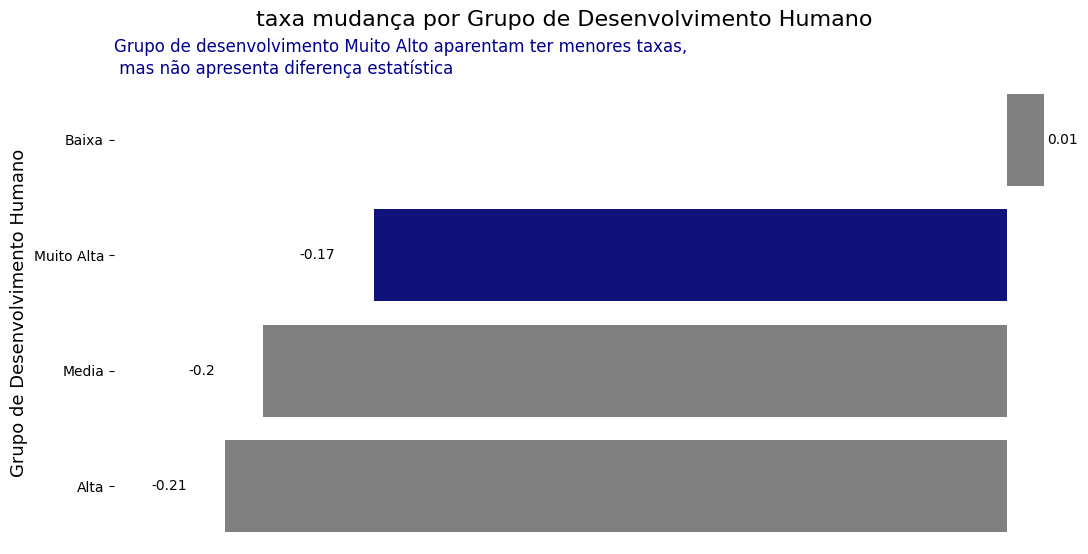

In [ ]:
coluna_desejada = 'taxa_aumento'

df = pd.DataFrame(dados.groupby(by = 'Human Development Groups').mean()[coluna_desejada])
df = df.reset_index()
df.sort_values(by = coluna_desejada, ascending = False, inplace = True)
df[coluna_desejada] = df[coluna_desejada].round(2)

plt.figure(figsize = (12, 6))
cores = ['gray', 'darkblue'] + ['gray'] * (len(df) - 2)
ax = sns.barplot(data = df, x = coluna_desejada, y = 'Human Development Groups', palette = cores)

plt.suptitle('taxa mudança por Grupo de Desenvolvimento Humano', fontsize = 16, y = 1.00)
plt.ylabel('Grupo de Desenvolvimento Humano', fontsize = 13)
plt.title('Grupo de desenvolvimento Muito Alto aparentam ter menores taxas, \n mas não apresenta diferença estatística', fontsize = 12, loc = 'left', color = 'darkblue')


for i, barra in enumerate(ax.patches):
    valor = df[coluna_desejada].iloc[i]
    largura_barra = barra.get_width()
    if i == 0:
      ax.text(largura_barra +0.001 , barra.get_y() + barra.get_height() / 2, f'{valor}', va='center')
    else:

      ax.text(largura_barra -0.02 , barra.get_y() + barra.get_height() / 2, f'{valor}', va='center')


plt.gca().get_xaxis().set_visible(False)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_color('none')  # Remove a borda inferior (eixo x)
ax.spines['left'].set_color('none')

plt.xlim(-0.24, 0.01)
plt.show()

A taxa muita próxima de zero da categoria "Baixa" se deve ao fato de no tratamento eu completar valores NaN com valores iguais a de anos próximos de 2020. Assim este dado informa mais que não houve mudanças do que um aumento na desigualdade.

## Teste de Hipótese.

Será que as taxas do grupo Médio e do grupo Muito alto são diferentes?

In [ ]:
dados.head(1)

,ISO3,paises,Human Development Groups,regioes,IDH(2021),taxa 2010,taxa 2011,taxa 2012,taxa 2013,taxa 2014,...,taxa 2016,taxa 2017,taxa 2018,taxa 2019,taxa 2020,taxa 2021,expectativa_vida,Anos esperado de escola,media anos de escola,taxa_aumento
0,AFG,Afghanistan,Baixa,SA,180.0,42.809,44.82338,44.82338,44.82338,44.82338,...,45.36517,45.36517,45.36517,45.36517,45.36517,45.36517,61.9824,10.263844,2.98507,0.143779


In [ ]:
X_media = dados[dados['Human Development Groups'] == 'Media']['taxa_aumento'].values
Y_muito_alta = dados[dados['Human Development Groups'] == 'Muito Alta']['taxa_aumento'].values
X_alta= dados[dados['Human Development Groups'] == 'Alta']['taxa_aumento'].values
X_media

array([-2.73285668e-16, -2.02532273e-01, -1.01985594e-01,  4.18030368e-01,
       -5.83847867e-01, -1.07755577e+00, -8.69545306e-16, -1.14612587e-01,
       -1.80474406e-01,  2.23597364e-16, -3.37133706e-01, -3.95826262e-01,
       -3.03083636e-01, -3.41567238e-01, -1.85451049e-03, -3.58148986e-01,
       -6.28368706e-01, -8.66541259e-02,  1.96303217e-01, -3.49353846e-01,
       -1.37965242e+00, -2.94722937e-01, -1.35964685e-01, -3.41607085e-17,
        1.74864895e-01, -2.08817706e-01,  9.33069650e-01, -2.59552133e-01,
       -1.20203042e-01, -3.09734550e-01,  0.00000000e+00, -3.62225874e-01,
       -1.51740594e-01, -4.96883032e-17, -1.36642834e-16, -4.41433566e-02,
       -3.41363077e-01, -1.10940420e-01,  2.48441516e-16, -7.53939890e-01,
       -3.71947413e-01, -3.27985105e-01])

In [ ]:
Y_muito_alta

array([-5.76283116e-01, -1.02207238e-01,  4.85246917e-02, -6.94032867e-02,
        2.47379486e-32, -1.15500999e+00, -6.65083217e-02, -2.08320874e-01,
       -1.30828671e-01, -2.68078920e-01, -1.80223671e-01, -1.79653846e-02,
       -5.16761189e-01, -8.69374126e-03, -5.85519930e-02, -4.73306294e-02,
        2.27603846e-02, -1.68179371e-02, -8.03872935e-02,  1.94976224e-02,
       -6.88790210e-03, -2.72663226e-01, -6.63595804e-02, -2.99829021e-02,
        2.18226923e-02, -2.02103346e-01, -1.73804930e-01, -4.96883032e-17,
       -3.72317832e-01, -1.77455572e-01, -1.55281853e-01, -2.23195629e-01,
       -8.95450699e-02, -4.39734494e-01, -5.33380070e-02, -1.36642834e-16,
        1.27467725e-01,  1.18524301e-01,  1.29913593e-02,  2.24075175e-02,
       -2.27549686e+00, -2.41196143e-01, -1.36270699e-01, -2.16003531e-01,
       -8.31345788e-01,  5.13067483e-02, -1.65888703e-01,  2.79496706e-17,
       -3.37500301e-02, -1.08182622e-01, -2.33040461e-01,  1.82926573e-02,
       -8.73675874e-02, -

In [ ]:
resultado_teste, p_valor = stats.normaltest(X_media)

# Defina um nível de significância (geralmente 0.05)
nivel_significancia = 0.05

# Compare o valor-p com o nível de significância
if p_valor < nivel_significancia:
    print("Os dados NÃO seguem uma distribuição normal (rejeita-se a hipótese nula).")
else:
    print("Os dados seguem uma distribuição normal (aceita-se a hipótese nula).")

Os dados NÃO seguem uma distribuição normal (rejeita-se a hipótese nula).


In [ ]:
resultado_teste, p_valor = stats.normaltest(Y_muito_alta)

# Defina um nível de significância (geralmente 0.05)
nivel_significancia = 0.05

# Compare o valor-p com o nível de significância
if p_valor < nivel_significancia:
    print("Os dados NÃO seguem uma distribuição normal (rejeita-se a hipótese nula).")
else:
    print("Os dados seguem uma distribuição normal (aceita-se a hipótese nula).")

Os dados NÃO seguem uma distribuição normal (rejeita-se a hipótese nula).


In [ ]:
import scipy.stats as stats

resultado_teste = stats.mannwhitneyu(X_media, Y_muito_alta)

valor_p = resultado_teste.pvalue

# Defina um nível de significância (geralmente 0.05)
nivel_significancia = 0.05

# Compare o valor-p com o nível de significância
if valor_p < nivel_significancia:
    print(p_valor)
    print("As médias são estatisticamente diferentes (rejeita-se a hipótese nula).")
else:
    print(p_valor)
    print("As médias não são estatisticamente diferentes (aceita-se a hipótese nula).")

1.3714383846352886e-20
As médias não são estatisticamente diferentes (aceita-se a hipótese nula).


* Não podemos concluir que países na categoria alta tem taxas diferentes de países na categoria Média.

In [ ]:
resultado_teste, p_valor = stats.normaltest(X_alta)

# Defina um nível de significância (geralmente 0.05)
nivel_significancia = 0.05

# Compare o valor-p com o nível de significância
if p_valor < nivel_significancia:
    print("Os dados NÃO seguem uma distribuição normal (rejeita-se a hipótese nula).")
else:
    print("Os dados seguem uma distribuição normal (aceita-se a hipótese nula).")

Os dados NÃO seguem uma distribuição normal (rejeita-se a hipótese nula).


In [ ]:
resultado_teste = stats.mannwhitneyu(X_alta, Y_muito_alta)

valor_p = resultado_teste.pvalue

# Defina um nível de significância (geralmente 0.05)
nivel_significancia = 0.05

# Compare o valor-p com o nível de significância
if valor_p < nivel_significancia:
    print(p_valor)
    print("As médias são estatisticamente diferentes (rejeita-se a hipótese nula).")
else:
    print(p_valor)
    print("As médias não são estatisticamente diferentes (aceita-se a hipótese nula).")

2.4254418226100064e-06
As médias não são estatisticamente diferentes (aceita-se a hipótese nula).
